In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importer les données

In [2]:
titanic = pd.read_csv('titanic-Dataset.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Exploration des données

1. Count plot des passagers survivants

<Axes: xlabel='Survived', ylabel='count'>

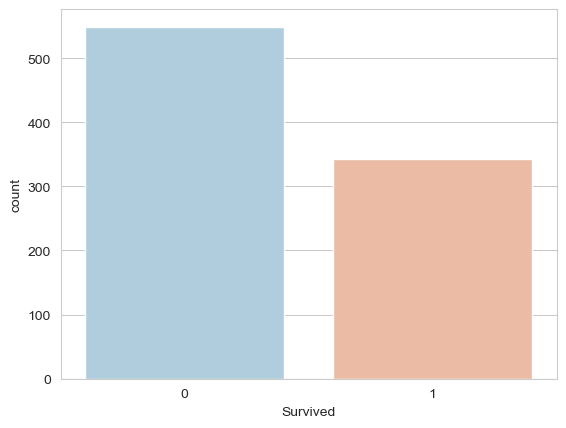

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

2. Count plot en ajoutant le sexe des passagers

<Axes: xlabel='Survived', ylabel='count'>

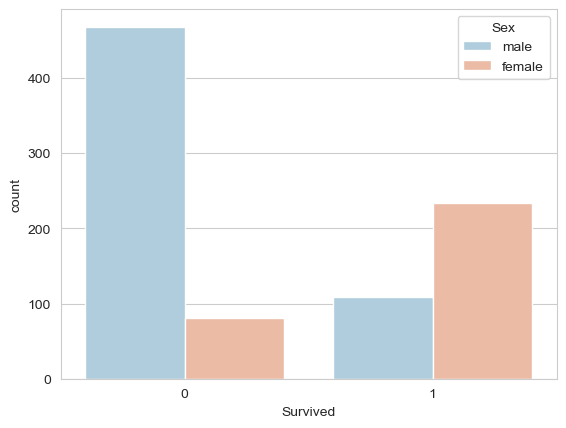

In [5]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

3. Count plot en ajoutant la class des passagers

<Axes: xlabel='Survived', ylabel='count'>

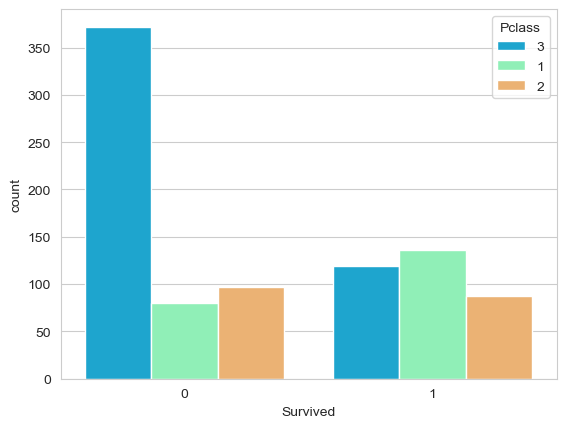

In [6]:
titanic['Pclass'] = titanic['Pclass'].astype(str)
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

4. Histogramme des âges

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


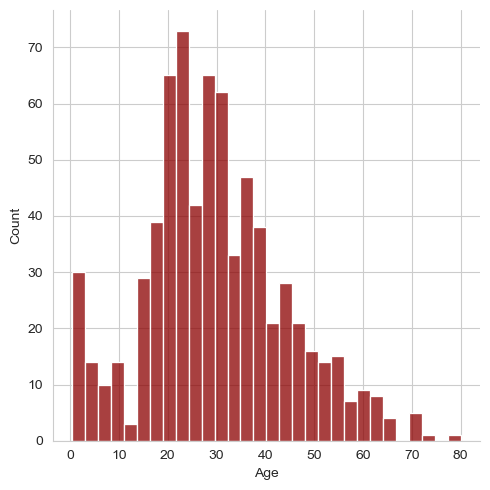

In [7]:
sns.displot(titanic['Age'],kde=False,color='darkred',bins=30)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
# Les données de l'age, de la cabin et du lieu d'embarquement sont manquantes

5. Affichage des données manquantes (heatmap)

<Axes: >

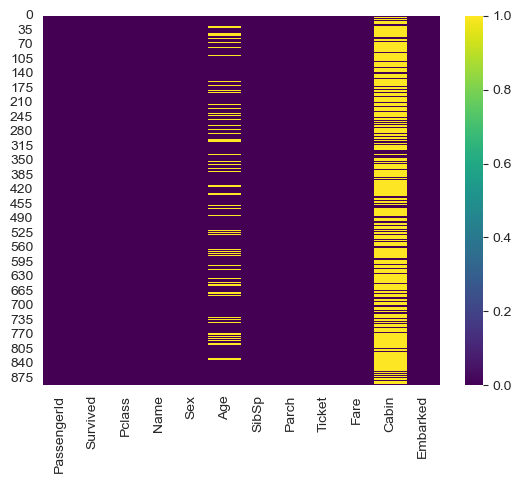

In [10]:
sns.heatmap(titanic.isnull(),cmap='viridis')

In [11]:
# Pour l'âge on remplace les données manquantes par l'âge moyen en fonction de la class

<Axes: xlabel='Pclass', ylabel='Age'>

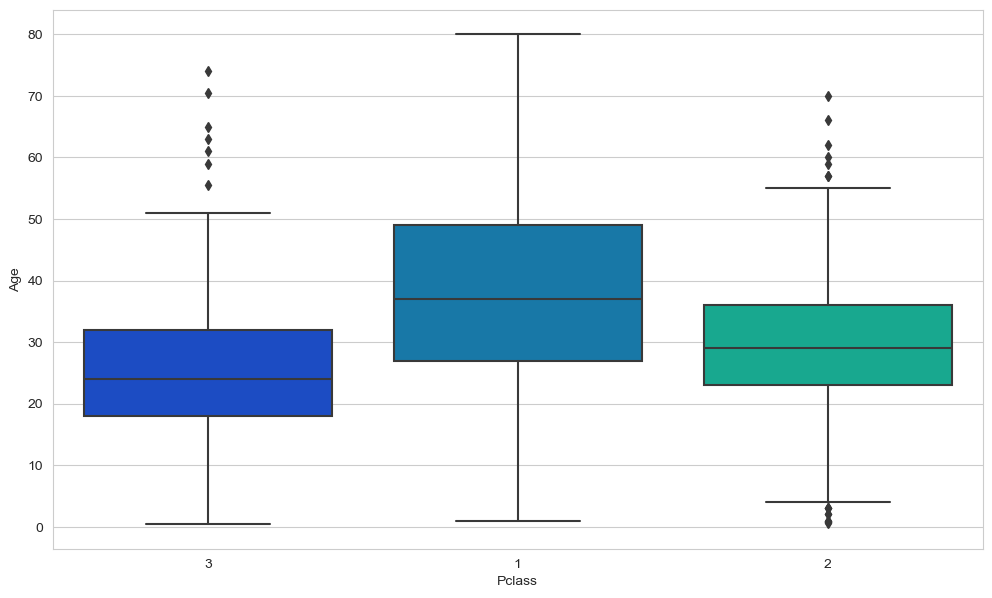

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [13]:
# Fonction pour remplacer l'âge manquant en fonction de la class

In [14]:
def impute_age(row):
    Age = row.iloc[0]
    Pclass = row.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [15]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

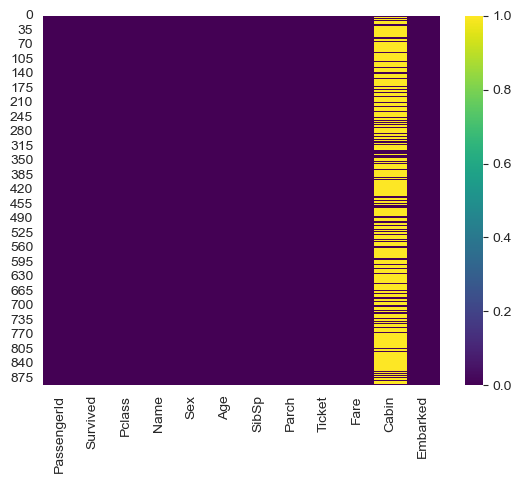

In [16]:
sns.heatmap(titanic.isnull(),cmap='viridis')

 Suppression de la colonne Cabin car données manquantes et inutiles

In [17]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


suppression des quelques valeurs manquantes pour la colonne Embarked

In [18]:
titanic.dropna(inplace=True)

<Axes: >

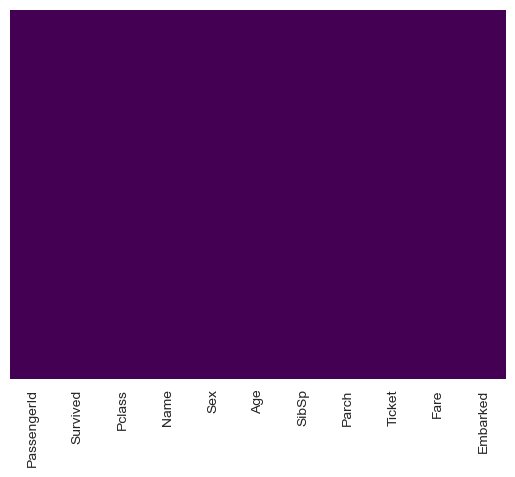

In [19]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 3. Conversion des type de données

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [27]:
pd.get_dummies(titanic['Sex']).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [28]:
# Suppr 1 colonne
sex = pd.get_dummies(titanic['Sex'],drop_first=True).astype(int)
print(sex)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]


In [25]:
pd.get_dummies(titanic['Embarked']).astype(int)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [29]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True).astype(int)

In [32]:
titanic.head()
# on remplace les colonnes (sex, embarked) par les nouvelles colonnes (sex et embarked) et on suppr les cols inutiles

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# 4. Preparation des données pour l'entrainement

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

In [38]:
print(X_train)

     PassengerId Pclass   Age  SibSp  Parch     Fare  male  Q  S
807          808      3  18.0      0      0   7.7750     0  0  1
651          652      2  18.0      0      1  23.0000     0  0  1
2              3      3  26.0      0      0   7.9250     0  0  1
690          691      1  31.0      1      0  57.0000     1  0  1
196          197      3  24.0      0      0   7.7500     1  1  0
..           ...    ...   ...    ...    ...      ...   ... .. ..
576          577      2  34.0      0      0  13.0000     0  0  1
840          841      3  20.0      0      0   7.9250     1  0  1
338          339      3  45.0      0      0   8.0500     1  0  1
524          525      3  24.0      0      0   7.2292     1  0  0
865          866      2  42.0      0      0  13.0000     0  0  1

[622 rows x 9 columns]


# 5.

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression(solver='liblinear')

# 6. Train le model

In [41]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

# 7. Evaluation

In [42]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
# Rapport de classification

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       163
           1       0.85      0.64      0.73       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [48]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix:\n', confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn,fp,fn,tp)
# vrai -, faux +
# faux -, vrai +

Confusion matrix:
 [[151  12]
 [ 37  67]]
151 12 37 67


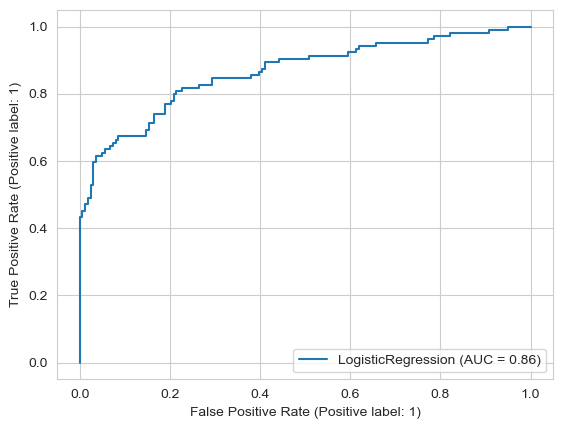

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logmodel, X_test, y_test)
plt.show()
# https://datatab.fr/tutorial/roc-curve